<a href="https://colab.research.google.com/github/TrollRider-Kristian/Springboard-AI-Mini-Projects/blob/main/codebasics-decision-tree-exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

titanic_raw = pandas.read_csv ('titanic.csv')
print (titanic_raw.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [90]:
# We need to encode the Sex of our passengers for our Decision Tree.
le_sex = LabelEncoder()
titanic_raw['Sex_Id'] = le_sex.fit_transform(titanic_raw['Sex'])
titanic_raw_sex_id = titanic_raw.drop('Sex', axis = 1)
# Now, 0 = 'Female' and 1 = 'Male'
print (titanic_raw_sex_id.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   
5                                   Moran, Mr. James   NaN      0      0   
6                            McCarthy, Mr. Timothy J  54.0      0      

In [91]:
titanic_relevant_raw = titanic_raw_sex_id[['Pclass', 'Sex_Id', 'Age', 'Fare', 'Survived']]
print (titanic_relevant_raw.head(10))

   Pclass  Sex_Id   Age     Fare  Survived
0       3       1  22.0   7.2500         0
1       1       0  38.0  71.2833         1
2       3       0  26.0   7.9250         1
3       1       0  35.0  53.1000         1
4       3       1  35.0   8.0500         0
5       3       1   NaN   8.4583         0
6       1       1  54.0  51.8625         0
7       3       1   2.0  21.0750         0
8       3       0  27.0  11.1333         1
9       2       0  14.0  30.0708         1


In [92]:
# https://www.dailymail.co.uk/news/article-2130003/Study-sea-disasters-men-better-survival-rate-ships-down.html
# According to dailymail, 20-35% of people survive the average shipwreck.
print (titanic_relevant_raw['Survived'].value_counts())
# A comparably less deadly shipwreck, but still within the normal distribution.
print (titanic_relevant_raw['Survived'].sum() / len (titanic_relevant_raw))

Survived
0    549
1    342
Name: count, dtype: int64
0.3838383838383838


In [93]:
num_rows_missing_data = titanic_relevant_raw.isnull().sum()
print (num_rows_missing_data)
# 20% of the passengers do NOT have a documented age.  That's a bit much for my liking.
# Fortunately, 'Age' is the ONLY relevant feature with missing values.
print (num_rows_missing_data / len (titanic_relevant_raw))

Pclass        0
Sex_Id        0
Age         177
Fare          0
Survived      0
dtype: int64
Pclass      0.000000
Sex_Id      0.000000
Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64


In [94]:
# Subset the passengers without a defined age and see if there is a pattern.
passengers_wo_ages = titanic_relevant_raw.loc[titanic_relevant_raw['Age'].isnull()]
print (passengers_wo_ages.head(10))

    Pclass  Sex_Id  Age      Fare  Survived
5        3       1  NaN    8.4583         0
17       2       1  NaN   13.0000         1
19       3       0  NaN    7.2250         1
26       3       1  NaN    7.2250         0
28       3       0  NaN    7.8792         1
29       3       1  NaN    7.8958         0
31       1       0  NaN  146.5208         1
32       3       0  NaN    7.7500         1
36       3       1  NaN    7.2292         1
42       3       1  NaN    7.8958         0


In [95]:
# I want to know if the data of passengers without a specified age
# is lopsided in any particular feature.  Start with checking the ratio of survived
# passengers to dead ones:
print (passengers_wo_ages['Survived'].value_counts())
# Around 29% of passengers without a specified age survived the shipwreck.
# Not very disproportionate.  Unknown age is not really a factor to survival,
# so I feel more comfortable dropping the rows now.
print (passengers_wo_ages['Survived'].sum() / len (passengers_wo_ages))

Survived
0    125
1     52
Name: count, dtype: int64
0.2937853107344633


<Axes: xlabel='Pclass', ylabel='count'>

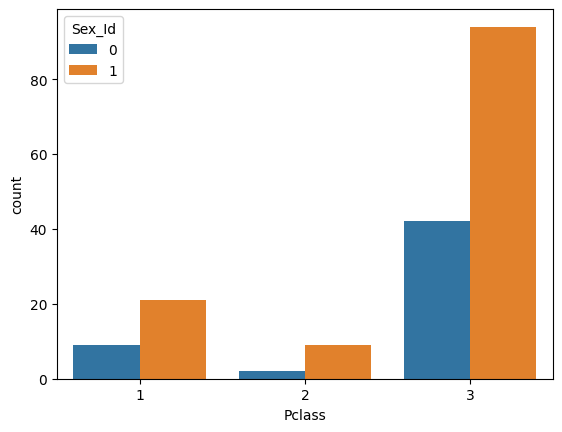

In [96]:
# But before I do, let's make a barplot showing the number of passengers without a
# specified age by Pclass and by Sex_Id.  Turns out, over half of these passengers
# are wealthy men.  Around 40 or 50 are wealthy women too.
sns.countplot (data = passengers_wo_ages.loc[:, ['Pclass', 'Sex_Id']],\
  x = 'Pclass', hue = 'Sex_Id')

In [97]:
passengers_with_ages = titanic_relevant_raw.loc[titanic_relevant_raw['Age'].notnull()]
print (passengers_with_ages.head(10))

    Pclass  Sex_Id   Age     Fare  Survived
0        3       1  22.0   7.2500         0
1        1       0  38.0  71.2833         1
2        3       0  26.0   7.9250         1
3        1       0  35.0  53.1000         1
4        3       1  35.0   8.0500         0
6        1       1  54.0  51.8625         0
7        3       1   2.0  21.0750         0
8        3       0  27.0  11.1333         1
9        2       0  14.0  30.0708         1
10       3       0   4.0  16.7000         1


<Axes: xlabel='Pclass', ylabel='count'>

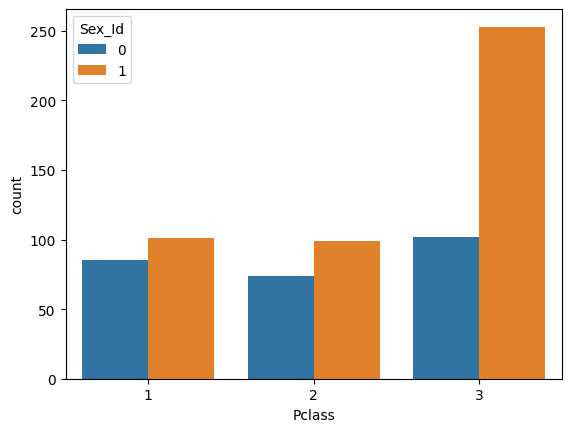

In [98]:
# Fortunately for us, the countplot for passengers who DID provide their ages is also
# lopsided in favor of wealthy men.  So I now feel more comfortable just using
# the rows with a known age for the model and dropping the rest.
# According to DataCamp, "If you are confident that the missing data is occurring at random"
# "then the most statistically sound strategy is to remove those rows."
sns.countplot(data = passengers_with_ages.loc[:, ['Pclass', 'Sex_Id']],\
  x = 'Pclass', hue = 'Sex_Id')

In [99]:
titanic_features = passengers_with_ages.drop(['Survived'], axis = 'columns')
print (titanic_features.head())
titanic_targets = passengers_with_ages['Survived']
print (titanic_targets.head())

   Pclass  Sex_Id   Age     Fare
0       3       1  22.0   7.2500
1       1       0  38.0  71.2833
2       3       0  26.0   7.9250
3       1       0  35.0  53.1000
4       3       1  35.0   8.0500
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
